In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df =pd.read_csv('Data1.csv')
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201,3,08-02-2016 05:46,08-02-2016 11:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,08-02-2016 05:58,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201,2,08-02-2016 06:07,08-02-2016 06:37,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,08-02-2016 05:51,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201,2,08-02-2016 06:49,08-02-2016 07:19,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,08-02-2016 06:56,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-15000,MapQuest,201,3,08-02-2016 07:23,08-02-2016 07:53,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,08-02-2016 07:38,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201,2,08-02-2016 07:39,08-02-2016 08:09,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,08-02-2016 07:53,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [ ]:
df['Wind_Speed(mph)'].min()

0.0

In [ ]:

st = pd.to_datetime(df.Start_Time, format='%d-%m-%Y %H:%M')
end = pd.to_datetime(df.End_Time, format='%d-%m-%Y %H:%M')
# st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
# end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')


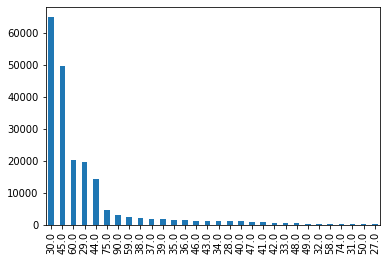

In [ ]:
diff=(end-st)
nmore = diff.astype('timedelta64[m]').value_counts().nlargest(30)
nmore.plot.bar()

In [ ]:
df['time'] = pd.to_datetime(df.Start_Time, format='%d-%m-%Y %H:%M')
# df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201,3,08-02-2016 05:46,08-02-2016 11:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,08-02-2016 05:58,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:07:00,A-2,MapQuest,201,2,08-02-2016 06:07,08-02-2016 06:37,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,08-02-2016 05:51,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:49:00,A-3,MapQuest,201,2,08-02-2016 06:49,08-02-2016 07:19,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,08-02-2016 06:56,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
2016-02-08 07:23:00,A-15000,MapQuest,201,3,08-02-2016 07:23,08-02-2016 07:53,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,08-02-2016 07:38,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2016-02-08 07:39:00,A-5,MapQuest,201,2,08-02-2016 07:39,08-02-2016 08:09,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,08-02-2016 07:53,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


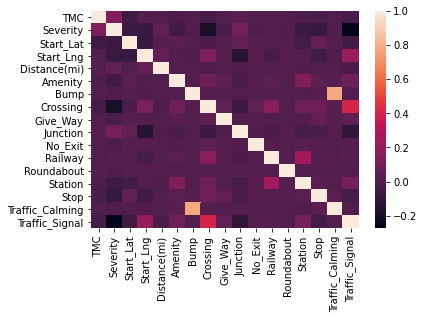

In [ ]:
def corr(df):
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print('no use')
        return
    corr = df.corr()
    sns.heatmap(corr)
corr(df)

In [ ]:
df_tem = df
df_tem.isnull().sum()

ID                            0
Source                        0
TMC                           0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  199998
End_Lng                  199998
Distance(mi)                  0
Description                   0
Number                   138897
Street                        0
Side                          0
City                         14
County                        0
State                         0
Zipcode                      30
Country                       0
Timezone                     30
Airport_Code                 30
Weather_Timestamp          1543
Temperature(F)             2835
Wind_Chill(F)            178608
Humidity(%)                3243
Pressure(in)               2203
Visibility(mi)             3262
Wind_Direction             1556
Wind_Speed(mph)           38443
Precipitation(in)        181649
Weather_

In [ ]:
df_tem = df_tem.drop(['Distance(mi)', 'TMC', 'Country', 'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

In [ ]:
cols = ["End_Lat", "End_Lng", "Number"]
df_tem = df_tem.drop(cols, axis=1)

In [ ]:
pmean = df_tem['Pressure(in)'].mean()
tmean = df_tem['Temperature(F)'].mean()
wcmean = df_tem['Wind_Chill(F)'].mean()
hmean = df_tem['Humidity(%)'].mean()
wsmean = df_tem['Wind_Speed(mph)'].mean()
prmean = df_tem['Precipitation(in)'].mean()

In [ ]:
df_tem['Pressure(in)']=df_tem['Pressure(in)'].fillna(pmean)
df_tem['Temperature(F)'] = df_tem['Temperature(F)'].fillna(tmean)
df_tem['Wind_Chill(F)'] = df_tem['Wind_Chill(F)'].fillna(wcmean)
df_tem['Humidity(%)'] = df_tem['Humidity(%)'].fillna(hmean)
df_tem['Wind_Speed(mph)'] = df_tem['Wind_Speed(mph)'].fillna(wsmean)
df_tem['Precipitation(in)']=df_tem['Precipitation(in)'].fillna(prmean)

In [ ]:
visMode = df_tem["Visibility(mi)"].mode()
df_tem['Visibility(mi)'] = df_tem['Visibility(mi)'].fillna(df_tem['Visibility(mi)'].mode()[0])
df_tem['Wind_Direction'] = df_tem['Wind_Direction'].fillna(df_tem['Wind_Direction'].mode()[0])
df_tem['Weather_Condition'] = df_tem['Weather_Condition'].fillna(df_tem['Weather_Condition'].mode()[0])
df_tem['Sunrise_Sunset'] = df_tem['Sunrise_Sunset'].fillna(df_tem['Sunrise_Sunset'].mode()[0])

In [ ]:
df_tem.dropna(axis=0, inplace=True)

In [ ]:
df_tem.drop(['Timezone','Weather_Timestamp', 'Start_Time', 'End_Time', 'ID', 'Source',	'Amenity','Bump','Crossing',	'Give_Way',	'Junction',	'No_Exit',	'Railway'	,'Roundabout','Station',	'Stop','Traffic_Calming','Traffic_Signal','Turning_Loop'], axis = 1, inplace = True)

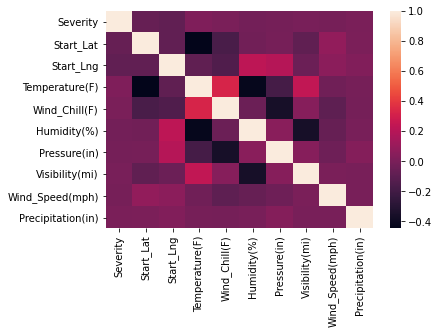

In [ ]:
final_corr=df_tem.corr()
sns.heatmap(final_corr)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_tem['Sunrise_Sunset'] = label_encoder.fit_transform(df_tem['Sunrise_Sunset'])
df_tem['Weather_Condition'] = label_encoder.fit_transform(df_tem['Weather_Condition'])
df_tem['Wind_Direction'] = label_encoder.fit_transform(df_tem['Wind_Direction'])

In [ ]:
X = df_tem.drop(['Severity'], axis = 1)
Y = df_tem['Severity']

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.2, random_state=120)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor(n_estimators = 75,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=75, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.9294550401854325


In [ ]:
y_pred

array([2.97333333, 2.21333333, 2.        , ..., 2.        , 2.17333333,
       2.        ])

In [ ]:
test = regressor.predict([[34.064030,-117.812004,53.6,30.399621,72.0,30.00,10.0,1,8.511951,0.057422,3,0]])

In [ ]:
test

array([2.97333333])

In [ ]:
import pickle

In [ ]:
pickle_out = open("accident2.pkl","wb")
pickle.dump(regressor, pickle_out)
pickle_out.close()